In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
car_df = pd.read_csv('cars.csv')

In [3]:
brand_df = pd.read_csv('brand.csv')

In [4]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [5]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


# 목표 : 중고차의 다양한 특성을 활용하여 중고차 가격 예측 모델 만들기 



## 1. cars.csv와 brand.csv 의 데이터 합치기

In [6]:
car_df['title'].unique()

array(['SKODA FABIA', 'VAUXHALL CORSA', 'HYUNDAI I30', 'MINI HATCH',
       'HYUNDAI COUPE', 'FORD FOCUS', 'VOLVO 740', 'PEUGEOT 207',
       'FORD FIESTA', 'VAUXHALL INSIGNIA', 'BMW 3 SERIES', 'CITROEN C1',
       'CITROEN C4', 'VAUXHALL ASTRA', 'FORD MONDEO',
       'MERCEDES-BENZ A180', 'PEUGEOT 407', 'FORD KA',
       'MERCEDES-BENZ A CLASS', 'MAZDA MAZDA2', 'SAAB 9-3',
       'VOLKSWAGEN POLO', 'BMW 1 SERIES', 'HONDA ACCORD',
       'VOLKSWAGEN BEETLE', 'MG MG6', 'FORD C-MAX', 'HONDA CIVIC',
       'TOYOTA AURIS', 'VOLVO S40', 'SEAT IBIZA', 'PEUGEOT 308',
       'VAUXHALL MERIVA', 'MERCEDES-BENZ B CLASS', 'MAZDA MAZDA3',
       'NISSAN 350 Z', 'ALFA ROMEO MITO', 'RENAULT FLUENCE',
       'VOLKSWAGEN PASSAT', 'KIA SPORTAGE', 'CITROEN XM',
       'VAUXHALL ANTARA', 'NISSAN NOTE', 'BMW 5 SERIES', 'HONDA CR-V',
       'PROTON SAVVY', 'NISSAN MICRA', 'FIAT PANDA', 'RENAULT MEGANE',
       'RENAULT CLIO', 'HYUNDAI I20', 'CITROEN C3', 'AUDI A6 SALOON',
       'TOYOTA YARIS', 'FIAT 500', 

In [7]:
brand_df['title'].unique()

array(['skoda', 'vauxhall', 'hyundai', 'mini', 'ford', 'volvo', 'peugeot',
       'bmw', 'citroen', 'mercedes-benz', 'mazda', 'saab', 'volkswagen',
       'honda', 'mg', 'toyota', 'seat', 'nissan', 'alfa', 'renault',
       'kia', 'proton', 'fiat', 'audi', 'mitsubishi', 'lexus', 'land',
       'chevrolet', 'suzuki', 'dacia', 'daihatsu', 'jeep', 'jaguar',
       'chrysler', 'rover', 'ds', 'daewoo', 'dodge', 'porsche', 'subaru',
       'infiniti', 'abarth', 'smart', 'marcos', 'maserati', 'ssangyong',
       'lagonda', 'isuzu'], dtype=object)

In [12]:
# brand_df와 merge하기 위해 car_df의 title column에서 brand_name 추출하기
car_df['title'].str.split(' ', n=1).str[0].str.lower()

0          skoda
1       vauxhall
2        hyundai
3           mini
4       vauxhall
          ...   
3682     renault
3683        audi
3684         bmw
3685       honda
3686    vauxhall
Name: title, Length: 3687, dtype: object

In [13]:
brand_df.rename(columns={'title': 'brand_name'}, inplace=True)

In [14]:
car_df['brand_name'] = car_df['title'].str.split(' ', n=1).str[0].str.lower()

In [15]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand_name
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,hyundai
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,vauxhall


In [16]:
brand_df.head()

,brand_name,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [17]:
car_df.merge(brand_df, on = 'brand_name', how = 'left')

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand_name,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,hyundai,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,vauxhall,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,renault,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,audi,Germany
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,bmw,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,honda,Japan


In [18]:
mcar_df = car_df.merge(brand_df, on = 'brand_name', how = 'left')

###  brand_name으로 group지어서 title을 대신할 수 있는지 확인

In [31]:
car_df.groupby('brand_name')['Price'].mean().sort_values(ascending=False).head(10)

brand_name
lagonda      14995.000000
ds           14293.833333
maserati     13300.000000
marcos       11495.000000
abarth       11216.333333
land         10741.428571
mg            9173.600000
jaguar        8680.766667
ssangyong     8636.000000
infiniti      8625.714286
Name: Price, dtype: float64

In [35]:
car_df.groupby('brand_name')['Price'].min().sort_values(ascending=False).head(30)

brand_name
lagonda          14995
marcos           11495
maserati         10000
ds                6493
infiniti          5989
abarth            4950
smart             4795
ssangyong         4277
dacia             3400
dodge             3250
subaru            2395
isuzu             2250
saab              1995
lexus             1990
chevrolet         1795
kia               1795
jaguar            1599
porsche           1500
alfa              1500
daihatsu          1495
rover             1495
chrysler          1475
mg                1348
bmw               1289
land              1000
jeep              1000
mini               999
mercedes-benz      995
daewoo             995
citroen            993
Name: Price, dtype: int64

In [33]:
car_df.groupby('brand_name')['Price'].max().sort_values(ascending=False).head(10)

brand_name
mercedes-benz    33900
land             30000
bmw              28240
seat             25995
audi             25000
ds               24770
mazda            23910
peugeot          22999
ford             21798
renault          21495
Name: Price, dtype: int64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
car_df['brand_name'].value_counts().head(10).index

Index(['vauxhall', 'ford', 'volkswagen', 'bmw', 'peugeot', 'toyota', 'nissan',
       'renault', 'mercedes-benz', 'audi'],
      dtype='object', name='brand_name')

<Axes: title={'center': 'Price'}, xlabel='brand_name'>

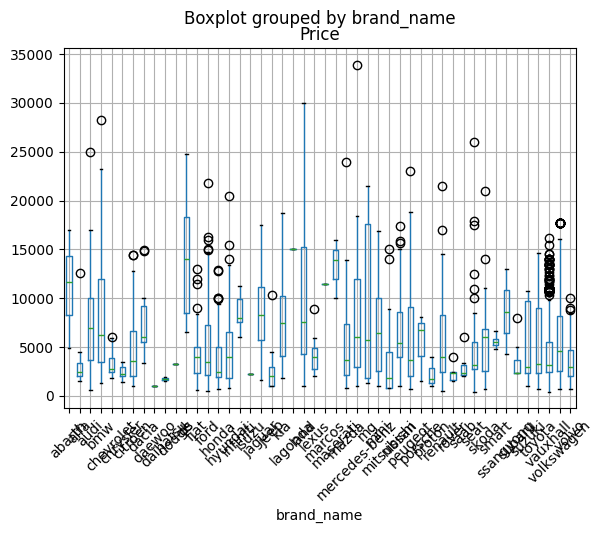

In [42]:
car_df.boxplot(column='Price', by='brand_name', rot = 45)

brand 별로는 묶지 못하겠음. model에 따른 가격이 천차만별임

### brand_name과 Body type을 묶어서 대체 가능한지 확인
brand_name과 Body type을 묶어보고자 함. --> 가격 표준편차가 생각보다 큼 묶지 못하겠음.

In [43]:
car_df['Body type'].unique()

array(['Hatchback', 'Coupe', 'Estate', 'Saloon', 'Convertible', 'MPV',
       'SUV', 'Minibus', 'Combi Van', 'Pickup'], dtype=object)

In [50]:
pd.pivot_table(car_df, index = 'brand_name', columns = 'Body type', values = 'Price', aggfunc = 'mean')

Body type,Combi Van,Convertible,Coupe,Estate,Hatchback,MPV,Minibus,Pickup,SUV,Saloon
brand_name,,,,,,,,,,
abarth,NaN,NaN,NaN,NaN,11216.333333,NaN,NaN,NaN,NaN,NaN
alfa,NaN,NaN,2242.500000,NaN,3531.461538,NaN,NaN,NaN,NaN,2386.333333
audi,NaN,6780.000000,13375.904762,7389.285714,5871.224138,NaN,NaN,NaN,9469.700000,7215.772727
bmw,NaN,4400.333333,10002.520833,3704.750000,7450.892857,14447.000000,NaN,NaN,8005.000000,9035.009346
chevrolet,NaN,NaN,NaN,2950.000000,2788.000000,NaN,NaN,NaN,4723.500000,2495.000000
chrysler,NaN,NaN,NaN,NaN,1862.500000,2950.000000,NaN,NaN,NaN,2747.000000
citroen,NaN,5495.000000,NaN,NaN,4474.333333,3585.882353,NaN,NaN,11705.250000,5247.500000
dacia,NaN,NaN,NaN,7747.500000,5896.500000,NaN,NaN,NaN,14847.000000,NaN
daewoo,NaN,NaN,NaN,NaN,995.000000,NaN,NaN,NaN,NaN,NaN


In [51]:
pd.pivot_table(car_df, index = 'brand_name', columns = 'Body type', values = 'Price', aggfunc = 'max')

Body type,Combi Van,Convertible,Coupe,Estate,Hatchback,MPV,Minibus,Pickup,SUV,Saloon
brand_name,,,,,,,,,,
abarth,NaN,NaN,NaN,NaN,17000.0,NaN,NaN,NaN,NaN,NaN
alfa,NaN,NaN,2495.0,NaN,12599.0,NaN,NaN,NaN,NaN,2489.0
audi,NaN,15990.0,16555.0,25000.0,15361.0,NaN,NaN,NaN,16995.0,16995.0
bmw,NaN,7200.0,17599.0,6295.0,18798.0,14447.0,NaN,NaN,28240.0,23220.0
chevrolet,NaN,NaN,NaN,2950.0,3990.0,NaN,NaN,NaN,5999.0,2495.0
chrysler,NaN,NaN,NaN,NaN,2250.0,2950.0,NaN,NaN,NaN,3495.0
citroen,NaN,5495.0,NaN,NaN,12771.0,11999.0,NaN,NaN,14436.0,8000.0
dacia,NaN,NaN,NaN,9995.0,9999.0,NaN,NaN,NaN,14899.0,NaN
daewoo,NaN,NaN,NaN,NaN,995.0,NaN,NaN,NaN,NaN,NaN


In [52]:
pd.pivot_table(car_df, index = 'brand_name', columns = 'Body type', values = 'Price', aggfunc = 'min')

Body type,Combi Van,Convertible,Coupe,Estate,Hatchback,MPV,Minibus,Pickup,SUV,Saloon
brand_name,,,,,,,,,,
abarth,NaN,NaN,NaN,NaN,4950.0,NaN,NaN,NaN,NaN,NaN
alfa,NaN,NaN,1990.0,NaN,1500.0,NaN,NaN,NaN,NaN,2250.0
audi,NaN,2495.0,3495.0,595.0,850.0,NaN,NaN,NaN,1994.0,950.0
bmw,NaN,1800.0,1950.0,1700.0,1800.0,14447.0,NaN,NaN,2275.0,1289.0
chevrolet,NaN,NaN,NaN,2950.0,1795.0,NaN,NaN,NaN,2495.0,2495.0
chrysler,NaN,NaN,NaN,NaN,1475.0,2950.0,NaN,NaN,NaN,1999.0
citroen,NaN,5495.0,NaN,NaN,993.0,995.0,NaN,NaN,8490.0,2495.0
dacia,NaN,NaN,NaN,5500.0,3400.0,NaN,NaN,NaN,14795.0,NaN
daewoo,NaN,NaN,NaN,NaN,995.0,NaN,NaN,NaN,NaN,NaN


In [53]:
pd.pivot_table(car_df, index = 'brand_name', columns = 'Body type', values = 'Price', aggfunc = 'std')

Body type,Combi Van,Convertible,Coupe,Estate,Hatchback,MPV,SUV,Saloon
brand_name,,,,,,,,
abarth,NaN,NaN,NaN,NaN,6039.482621,NaN,NaN,NaN
alfa,NaN,NaN,357.088924,NaN,2893.652295,NaN,NaN,123.005420
audi,NaN,4689.377180,5019.681433,8161.391542,3501.992741,NaN,3905.917620,3880.201055
bmw,NaN,1748.278515,6327.395024,1703.449085,4324.076396,NaN,5445.526880,6973.223403
chevrolet,NaN,NaN,NaN,NaN,676.374157,NaN,1635.768627,NaN
chrysler,NaN,NaN,NaN,NaN,548.007755,NaN,NaN,1057.831745
citroen,NaN,NaN,NaN,NaN,2930.605153,2982.007585,3156.617955,3892.622830
dacia,NaN,NaN,NaN,3178.444981,1799.052359,NaN,73.539105,NaN
daihatsu,NaN,NaN,NaN,NaN,NaN,NaN,282.842712,NaN


In [67]:
# title에서 빈도수가 낮은 것은 other로 바꾸고자 함
car_df['title'].value_counts()

title
VAUXHALL CORSA         223
FORD FOCUS             162
VAUXHALL ASTRA         155
FORD FIESTA            128
BMW 3 SERIES           119
                      ... 
FORD FOCUS C-MAX         1
CHRYSLER PT CRUISER      1
VOLKSWAGEN LUPO          1
FIAT MULTIPLA            1
MG ZR                    1
Name: count, Length: 455, dtype: int64

In [78]:
car_df['title'].value_counts()[car_df['title'].value_counts() >= 10] #100개 미만 정도로 추리고 싶어서 10 미만을 other로 묶고자 함. 

title
VAUXHALL CORSA                  223
FORD FOCUS                      162
VAUXHALL ASTRA                  155
FORD FIESTA                     128
BMW 3 SERIES                    119
                               ... 
FORD C-MAX                       10
CITROEN C4                       10
LAND ROVER RANGE ROVER SPORT     10
VAUXHALL ASTRA GTC               10
VOLKSWAGEN JETTA                 10
Name: count, Length: 81, dtype: int64

In [79]:
mcar_df['title'].value_counts()[mcar_df['title'].value_counts() >= 10]

title
VAUXHALL CORSA                  223
FORD FOCUS                      162
VAUXHALL ASTRA                  155
FORD FIESTA                     128
BMW 3 SERIES                    119
                               ... 
FORD C-MAX                       10
CITROEN C4                       10
LAND ROVER RANGE ROVER SPORT     10
VAUXHALL ASTRA GTC               10
VOLKSWAGEN JETTA                 10
Name: count, Length: 81, dtype: int64

In [80]:
mcar_df['title'].value_counts()[mcar_df['title'].value_counts() >= 10].index

Index(['VAUXHALL CORSA', 'FORD FOCUS', 'VAUXHALL ASTRA', 'FORD FIESTA',
       'BMW 3 SERIES', 'RENAULT CLIO', 'VOLKSWAGEN POLO', 'TOYOTA YARIS',
       'MINI HATCH', 'MERCEDES-BENZ C CLASS', 'VOLKSWAGEN GOLF',
       'BMW 1 SERIES', 'PEUGEOT 308', 'HONDA CIVIC', 'NISSAN QASHQAI',
       'TOYOTA AYGO', 'PEUGEOT 207', 'VAUXHALL INSIGNIA', 'SEAT IBIZA',
       'AUDI A3', 'FIAT 500', 'MERCEDES-BENZ A CLASS', 'SKODA FABIA',
       'KIA SPORTAGE', 'NISSAN JUKE', 'FORD MONDEO', 'AUDI A4',
       'VAUXHALL ADAM', 'NISSAN LEAF', 'HONDA JAZZ', 'RENAULT MEGANE',
       'PEUGEOT 308 SW', 'HYUNDAI I20', 'PEUGEOT 208', 'CITROEN C3',
       'BMW 5 SERIES', 'HYUNDAI I30', 'BMW 2 SERIES', 'VOLKSWAGEN PASSAT',
       'MERCEDES-BENZ E CLASS', 'FORD KA', 'NISSAN MICRA',
       'VOLKSWAGEN T-CROSS', 'FIAT 500C', 'MITSUBISHI OUTLANDER',
       'SUZUKI SWIFT', 'PEUGEOT 3008', 'VAUXHALL ZAFIRA', 'CITROEN C1',
       'MAZDA MAZDA2', 'BMW X1', 'RENAULT GRAND SCENIC',
       'AUDI A5 DIESEL COUPE', 'JAGUAR XF',

In [81]:
top10 = mcar_df['title'].value_counts()[mcar_df['title'].value_counts() >= 10].index

In [82]:
mcar_df['title'].apply(lambda x: x if x in top10 else 'Other')

0          SKODA FABIA
1       VAUXHALL CORSA
2          HYUNDAI I30
3           MINI HATCH
4       VAUXHALL CORSA
             ...      
3682    RENAULT MEGANE
3683           AUDI A4
3684      BMW 3 SERIES
3685      HONDA ACCORD
3686    VAUXHALL CORSA
Name: title, Length: 3687, dtype: object

In [84]:
mcar_df['new_title'] = mcar_df['title'].apply(lambda x: x if x in top10 else 'Other')

In [90]:
mcar_df['new_title'].value_counts()[mcar_df['new_title'].value_counts() >= 10]

new_title
Other                            875
VAUXHALL CORSA                   223
FORD FOCUS                       162
VAUXHALL ASTRA                   155
FORD FIESTA                      128
                                ... 
SKODA OCTAVIA                     10
LAND ROVER RANGE ROVER EVOQUE     10
VAUXHALL ASTRA GTC                10
LAND ROVER RANGE ROVER SPORT      10
VOLKSWAGEN JETTA                  10
Name: count, Length: 82, dtype: int64

In [87]:
mcar_df.head(10)

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand_name,country,new_title
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,Czech Republic,SKODA FABIA
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,United Kingdom,VAUXHALL CORSA
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,hyundai,South Korea,HYUNDAI I30
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,United Kingdom,MINI HATCH
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,vauxhall,United Kingdom,VAUXHALL CORSA
5,HYUNDAI COUPE,800,124196,2007,3.0,Petrol,Coupe,2.0L,Manual,3.0,4.0,Euro 4,NaN,hyundai,South Korea,Other
6,FORD FOCUS,798,140599,2008,NaN,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,ford,United States,FORD FOCUS
7,VAUXHALL CORSA,1995,90000,2009,NaN,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,NaN,vauxhall,United Kingdom,VAUXHALL CORSA
8,VOLVO 740,750,225318,2025,NaN,Petrol,Estate,2.3L,Automatic,5.0,NaN,NaN,NaN,volvo,Sweden,Other
9,PEUGEOT 207,1299,87000,2008,5.0,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,peugeot,France,PEUGEOT 207


## 2. Column 살펴보기
- object -> int or float 로 바꿔주기
- 결측치 처리하기
- outlier 처리

In [91]:
mcar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
 13  brand_name         3687 non-null   object 
 14  country            3687 non-null   object 
 15  new_title          3687 non-null   object 
dtypes: float64(3), int64(3),

In [92]:
mcar_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000


### 1) Engine과 Emission Class 숫자형으로 바꿔주기

In [121]:
# Engine 숫자형 바꿔주기

In [93]:
mcar_df['Engine'].unique()

array(['1.4L', '1.2L', '1.3L', '2.0L', '1.6L', '2.3L', '1.8L', '1.0L',
       '3.0L', '1.5L', '1.9L', '2.4L', '2.2L', '3.5L', '3.2L', '2.5L',
       '1.1L', '3.1L', '3.7L', '2.6L', '2.1L', '2.8L', '5.0L', '0.8L',
       '2.7L', '1.7L', '0.9L', '4.2L', nan, '4.4L', '4.3L', '3.3L',
       '5.5L', '4.8L', '6.3L'], dtype=object)

In [98]:
mcar_df.isna().mean()

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.382696
Fuel type            0.000000
Body type            0.000000
Engine               0.012205
Gearbox              0.000000
Doors                0.006781
Seats                0.009493
Emission Class       0.023596
Service history      0.853539
brand_name           0.000000
country              0.000000
new_title            0.000000
dtype: float64

In [96]:
mcar_df[mcar_df['Engine'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand_name,country,new_title
679,BMW 3 SERIES,4200,68060,2007,1.0,Petrol,Saloon,NaN,Automatic,NaN,NaN,NaN,Full,bmw,Germany,BMW 3 SERIES
835,TOYOTA MARK X,7500,77000,2021,3.0,Petrol,Saloon,NaN,Automatic,NaN,NaN,NaN,NaN,toyota,Japan,Other
856,NISSAN CUBIC,4500,47000,2007,3.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,NaN,nissan,Japan,Other
1087,AUDI A1,7995,50500,2012,NaN,Petrol,Hatchback,NaN,Automatic,3.0,4.0,NaN,NaN,audi,Germany,AUDI A1
1304,MAZDA MAZDA6,1500,155670,2015,1.0,Diesel,Estate,NaN,Manual,NaN,NaN,NaN,NaN,mazda,Japan,Other
1429,FORD FOCUS,1895,109000,2009,NaN,Petrol,Hatchback,NaN,Manual,5.0,5.0,NaN,NaN,ford,United States,FORD FOCUS
1533,CITROEN C1,3900,71000,2015,3.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,NaN,citroen,France,CITROEN C1
1619,FORD KA,2490,68837,2007,4.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,Full,ford,United States,FORD KA
2022,AUDI A3,5750,139225,2012,3.0,Diesel,Hatchback,NaN,Automatic,NaN,NaN,NaN,NaN,audi,Germany,AUDI A3
2136,TOYOTA PRIUS,8950,66000,2012,NaN,Petrol Hybrid,Hatchback,NaN,Automatic,NaN,NaN,NaN,NaN,toyota,Japan,Other


In [99]:
mcar_df['Engine'].str.replace('L', '').astype(float)

0       1.4
1       1.2
2       1.4
3       1.4
4       1.3
       ... 
3682    1.6
3683    2.0
3684    2.0
3685    2.2
3686    1.2
Name: Engine, Length: 3687, dtype: float64

In [100]:
mcar_df['Engine'] = mcar_df['Engine'].str.replace('L', '').astype(float)

In [101]:
# 'Engine' 컬럼 결측치 처리 
mcar_df['Engine'].mean()

np.float64(1.6062602965403625)

In [102]:
mcar_df['Engine'].median()

np.float64(1.6)

In [103]:
mcar_df['Engine'].mode()

0    1.6
Name: Engine, dtype: float64

In [126]:
# Engine 5.0 이상인 경우 outlier인지 확인 --> Price도 높고 특정 title(brand)에서 가능한 값이어서 유지

In [111]:
mcar_df[mcar_df['Engine'] >= 5.0]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand_name,country,new_title
406,FORD MUSTANG,5000,99350,2005,1.0,Petrol,Coupe,5.0,Automatic,2.0,4.0,Euro 6,NaN,ford,United States,Other
569,MERCEDES-BENZ CLS,3995,84000,2005,4.0,Petrol,Saloon,5.0,Automatic,4.0,4.0,Euro 4,Full,mercedes-benz,Germany,Other
1740,MERCEDES-BENZ E CLASS,3995,73100,2002,5.0,Petrol,Saloon,5.0,Automatic,4.0,5.0,Euro 3,NaN,mercedes-benz,Germany,MERCEDES-BENZ E CLASS
2199,MERCEDES-BENZ CL,10000,90000,2007,3.0,Petrol,Coupe,5.5,Automatic,2.0,4.0,Euro 4,Full,mercedes-benz,Germany,Other
3049,MERCEDES-BENZ M CLASS,10850,107500,2007,5.0,Petrol,SUV,6.3,Automatic,5.0,5.0,Euro 4,NaN,mercedes-benz,Germany,Other


In [108]:
mcar_df.groupby('title')['Engine'].mean()

title
ABARTH 500                                           1.400000
ABARTH 595                                           1.400000
ABARTH FIAT 595 1.4 TJET (165PS) SCORPIONEORO        1.400000
ALFA ROMEO 159                                       2.033333
ALFA ROMEO BRERA                                     2.400000
ALFA ROMEO GIULIETTA                                 1.480000
ALFA ROMEO GT                                        2.000000
ALFA ROMEO MITO                                      1.387500
AUDI A1                                              1.454545
AUDI A1 SPORTBACK                                    1.000000
AUDI A3                                              1.773810
AUDI A3 CABRIOLET                                    1.800000
AUDI A3 HATCHBACK                                    1.400000
AUDI A4                                              1.896667
AUDI A4 AVANT                                        2.333333
AUDI A4 CABRIOLET                                    1.900000
AU

In [115]:
pd.set_option('display.max_rows', 30)

In [116]:
# 결측치 비율이 1.2% 정도로 적지만 
# 5.0 이상의 경우 price가 높고 벤츠가 주를 이루어 결측치 title을 보았을 때 해당사항이 없으며 mean과 median, 최빈값이 1.6으로 유사하며, 
# groupby로 확인해 보았을 때 결측치의 많은 부분을 차지하는 NISSAN의 mean값도 1.5로 전체 mean과 median과 큰 차이 없어서 
# Engine 결측치는 1.6으로 대체 결정 
mcar_df['Engine'].fillna(1.6)

0       1.4
1       1.2
2       1.4
3       1.4
4       1.3
       ... 
3682    1.6
3683    2.0
3684    2.0
3685    2.2
3686    1.2
Name: Engine, Length: 3687, dtype: float64

In [117]:
mcar_df['Engine'] = mcar_df['Engine'].fillna(1.6)

In [123]:
# Emission 바꿔주기
# mcar_df['Emission Class'].str.replace('Euro', '').astype(int)

In [124]:
# 결측치가 있으면 int로 변환이 되지 않아 NaN 먼저 처리하기
mcar_df['Emission Class'].unique()

array(['Euro 6', 'Euro 4', 'Euro 5', nan, 'Euro 3', 'Euro 2', 'Euro 1'],
      dtype=object)

In [125]:
mcar_df[mcar_df['Emission Class'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand_name,country,new_title
8,VOLVO 740,750,225318,2025,NaN,Petrol,Estate,2.3,Automatic,5.0,NaN,NaN,NaN,volvo,Sweden,Other
95,RENAULT FLUENCE,2490,67104,2010,1.0,Diesel,Saloon,1.5,Manual,4.0,5.0,NaN,NaN,renault,France,Other
163,HONDA ODYSSEY,2449,88240,2012,NaN,Petrol,MPV,2.4,Automatic,5.0,7.0,NaN,NaN,honda,Japan,Other
178,MERCEDES-BENZ CLK,3995,70000,2009,NaN,Petrol,Coupe,2.0,Automatic,2.0,5.0,NaN,NaN,mercedes-benz,Germany,Other
229,MERCEDES-BENZ 260,2995,57400,1991,NaN,Petrol,Saloon,2.6,Automatic,4.0,NaN,NaN,NaN,mercedes-benz,Germany,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,NISSAN LEAF,5390,60695,2014,NaN,Electric,Hatchback,1.6,Automatic,5.0,5.0,NaN,NaN,nissan,Japan,NISSAN LEAF
3464,TOYOTA CARINA,2450,120000,1991,NaN,Petrol,Saloon,1.6,Manual,4.0,NaN,NaN,NaN,toyota,Japan,Other
3572,ISUZU TROOPER,2250,147700,2001,NaN,Diesel,SUV,1.6,Automatic,5.0,5.0,NaN,NaN,isuzu,Japan,Other
3623,VAUXHALL CORSA,13998,28045,2020,NaN,Electric,Hatchback,1.6,Automatic,5.0,5.0,NaN,NaN,vauxhall,United Kingdom,VAUXHALL CORSA


In [127]:
# median 또는  최빈값 알아보기 위해 일단 0 (Euro0으로) 바꾸고 int 바꾼 뒤 확인해 보고자 함
mcar_df['Emission Class'] = mcar_df['Emission Class'].fillna('Euro 0')

In [132]:
mcar_df['Emission Class'].str.replace('Euro', '').astype(int)

0       6
1       4
2       5
3       4
4       5
       ..
3682    4
3683    5
3684    5
3685    4
3686    5
Name: Emission Class, Length: 3687, dtype: int64

In [133]:
mcar_df['Emission Class'] = mcar_df['Emission Class'].str.replace('Euro', '').astype(int)

In [134]:
mcar_df['Emission Class'].median()

np.float64(5.0)

In [135]:
mcar_df['Emission Class'].mean()

np.float64(4.794141578519121)

In [137]:
mcar_df['Emission Class'].mode()

0    5
Name: Emission Class, dtype: int64

In [138]:
# Emission Class 결측치 비율이 2.4%.삭제하기는 살짝 아쉬워서 median과 mean, mode값을 구해 보았을 때 유사하여 5.0으로 대체하고자 함.
mcar_df['Emission Class'] = mcar_df['Emission Class'].replace(0,5)

### 2) service history 결측치 ' unknown' 으로 채우기 (데이터손실 줄이기 위함, 일관성 완전성 유지)

In [139]:
mcar_df['Service history'] = mcar_df['Service history'].fillna('Unknown')

In [140]:
# 각 행별 결측치가 많은 행은 데이터 신뢰성을 떨어뜨릴 수 있어 삭제하고자 함
mcar_df.isna().sum(axis=1).max()

np.int64(3)

In [141]:
mcar_df.isna().sum(axis=1).mean()

np.float64(0.39896935177651205)

In [143]:
(mcar_df.isna().sum(axis=1) >= 2).sum()

np.int64(29)

In [144]:
mcar_df[mcar_df.isna().sum(axis=1) >= 2]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand_name,country,new_title
8,VOLVO 740,750,225318,2025,NaN,Petrol,Estate,2.3,Automatic,5.0,NaN,5,Unknown,volvo,Sweden,Other
229,MERCEDES-BENZ 260,2995,57400,1991,NaN,Petrol,Saloon,2.6,Automatic,4.0,NaN,5,Unknown,mercedes-benz,Germany,Other
513,NISSAN LAFESTA,3900,37000,2012,NaN,Petrol,MPV,2.0,Automatic,NaN,NaN,5,Unknown,nissan,Japan,Other
679,BMW 3 SERIES,4200,68060,2007,1.0,Petrol,Saloon,1.6,Automatic,NaN,NaN,5,Full,bmw,Germany,BMW 3 SERIES
699,MITSUBISHI FTO,8900,58900,2001,NaN,Petrol,Coupe,2.0,Automatic,NaN,NaN,5,Unknown,mitsubishi,Japan,Other
733,TOYOTA CAMRY,2389,125000,1990,NaN,Petrol,Estate,2.0,Automatic,5.0,NaN,5,Unknown,toyota,Japan,Other
823,VOLKSWAGEN POLO,6700,49600,2012,NaN,Petrol,Hatchback,1.2,Automatic,NaN,NaN,5,Unknown,volkswagen,Germany,VOLKSWAGEN POLO
835,TOYOTA MARK X,7500,77000,2021,3.0,Petrol,Saloon,1.6,Automatic,NaN,NaN,5,Unknown,toyota,Japan,Other
856,NISSAN CUBIC,4500,47000,2007,3.0,Petrol,Hatchback,1.6,Manual,NaN,NaN,5,Unknown,nissan,Japan,Other
1038,HONDA JAZZ,6750,33000,2013,NaN,Petrol Hybrid,Hatchback,1.5,Automatic,NaN,5.0,5,Unknown,honda,Japan,HONDA JAZZ


### 3) 결측치 처리

In [145]:
# 결측치가 각 행에 2개 이상인 것은 제거하기로 결정 (Seats, Doors, Previous Owners는 현재 목표에서 중요도가 다소 떨어지며,
# 많은 부분 결측치 값을 대체하였는데 2개 이상의 결측치가 더 있는 데이터는 데이터로서 정보가 떨어진다고 여겨지고 비율이 적어 제거하기로 함) 
mcar_df = mcar_df[mcar_df.isna().sum(axis=1) < 2]

In [146]:
(mcar_df.isna().sum(axis=1) >= 2).sum()

np.int64(0)

In [147]:
mcar_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 3686
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3658 non-null   object 
 1   Price              3658 non-null   int64  
 2   Mileage(miles)     3658 non-null   int64  
 3   Registration_Year  3658 non-null   int64  
 4   Previous Owners    2265 non-null   float64
 5   Fuel type          3658 non-null   object 
 6   Body type          3658 non-null   object 
 7   Engine             3658 non-null   float64
 8   Gearbox            3658 non-null   object 
 9   Doors              3651 non-null   float64
 10  Seats              3649 non-null   float64
 11  Emission Class     3658 non-null   int64  
 12  Service history    3658 non-null   object 
 13  brand_name         3658 non-null   object 
 14  country            3658 non-null   object 
 15  new_title          3658 non-null   object 
dtypes: float64(4), int64(4), obje

In [148]:
#  Previous Owners 결측치 처리
mcar_df['Previous Owners'].median()

np.float64(3.0)

In [149]:
mcar_df['Previous Owners'].mean()

np.float64(2.808830022075055)

In [151]:
mcar_df['Previous Owners'].unique()

array([ 3.,  4., nan,  5.,  1.,  2.,  6.,  7.,  9.,  8.])

In [152]:
## Previous Owners는 median 값으로 대체 
mcar_df['Previous Owners'] = mcar_df['Previous Owners'].fillna(mcar_df['Previous Owners'].median())

In [153]:
# Doors, Seats 는 결측치 비율이 낮아 제거하고자 함 
mcar_df[mcar_df['Doors'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand_name,country,new_title
595,VAUXHALL ASTRA,3950,56800,2015,4.0,Diesel,Hatchback,1.7,Manual,NaN,5.0,5,Unknown,vauxhall,United Kingdom,VAUXHALL ASTRA
957,NISSAN ELGRAND,4200,96000,2017,3.0,Petrol,Minibus,2.0,Automatic,NaN,7.0,5,Unknown,nissan,Japan,Other
1613,VOLKSWAGEN GOLF,1895,61000,2001,5.0,Petrol,Hatchback,1.6,Automatic,NaN,5.0,5,Unknown,volkswagen,Germany,VOLKSWAGEN GOLF
1957,JAGUAR XJ,8000,95000,2011,5.0,Diesel,Saloon,3.0,Automatic,NaN,5.0,5,Full,jaguar,United Kingdom,Other
2235,TOYOTA PRIUS,6350,72000,2012,1.0,Petrol Hybrid,Hatchback,1.8,Automatic,NaN,5.0,5,Unknown,toyota,Japan,Other
2375,MARCOS MARTINA,11495,19000,1981,5.0,Petrol,Convertible,2.0,Manual,NaN,2.0,5,Unknown,marcos,United Kingdom,Other
2762,HONDA FIT,4450,79208,2010,1.0,Petrol,Hatchback,1.3,Automatic,NaN,5.0,5,Unknown,honda,Japan,Other


In [154]:
# Doors, Seats 는 결측치 비율이 낮아 제거하고자 함 
mcar_df[mcar_df['Seats'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand_name,country,new_title
107,CITROEN XM,3250,126000,1995,4.0,Diesel,Hatchback,2.5,Manual,5.0,NaN,2,Unknown,citroen,France,Other
237,MG MIDGET,1875,75043,1972,3.0,Petrol,Convertible,1.3,Manual,2.0,NaN,5,Unknown,mg,United Kingdom,Other
645,ROVER MINI,1650,49309,1990,4.0,Petrol,Saloon,1.0,Automatic,2.0,NaN,5,Unknown,rover,United Kingdom,Other
931,BMW 3 SERIES,6700,105000,1999,7.0,Petrol,Coupe,2.5,Manual,2.0,NaN,2,Unknown,bmw,Germany,BMW 3 SERIES
1006,SAAB 900,5995,157000,1992,5.0,Petrol,Convertible,2.0,Manual,2.0,NaN,1,Unknown,saab,Sweden,Other
1353,BMW 3 SERIES,3495,115000,1987,4.0,Petrol,Saloon,1.8,Automatic,4.0,NaN,5,Unknown,bmw,Germany,BMW 3 SERIES
1381,CITROEN BX,4975,96000,1990,3.0,Petrol,Hatchback,1.6,Manual,5.0,NaN,5,Unknown,citroen,France,Other
2456,VAUXHALL COMBO,4250,35616,2010,1.0,Diesel,Combi Van,1.3,Manual,3.0,NaN,4,Unknown,vauxhall,United Kingdom,Other
3116,VOLKSWAGEN GOLF,7000,130000,1988,1.0,Petrol,Convertible,1.8,Manual,2.0,NaN,5,Unknown,volkswagen,Germany,VOLKSWAGEN GOLF


In [155]:
mcar_df = mcar_df.dropna(subset=['Doors', 'Seats'])

### 4) 카테고리형 변수 숫자형태로 변환

In [156]:
mcar_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3642 entries, 0 to 3686
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3642 non-null   object 
 1   Price              3642 non-null   int64  
 2   Mileage(miles)     3642 non-null   int64  
 3   Registration_Year  3642 non-null   int64  
 4   Previous Owners    3642 non-null   float64
 5   Fuel type          3642 non-null   object 
 6   Body type          3642 non-null   object 
 7   Engine             3642 non-null   float64
 8   Gearbox            3642 non-null   object 
 9   Doors              3642 non-null   float64
 10  Seats              3642 non-null   float64
 11  Emission Class     3642 non-null   int64  
 12  Service history    3642 non-null   object 
 13  brand_name         3642 non-null   object 
 14  country            3642 non-null   object 
 15  new_title          3642 non-null   object 
dtypes: float64(4), int64(4), obje

In [157]:
mcar_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
count,3642.000000,3.642000e+03,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,5791.688907,8.133136e+04,2011.959912,2.878913,1.603405,4.325096,4.900329,4.916255
std,4492.503750,3.940404e+04,4.760457,1.218010,0.482975,0.984232,0.574764,0.895755
min,400.000000,1.000000e+00,1987.000000,1.000000,0.800000,2.000000,2.000000,1.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,1.300000,3.000000,5.000000,4.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,1.600000,5.000000,5.000000,5.000000
75%,7998.000000,1.030000e+05,2016.000000,3.000000,1.800000,5.000000,5.000000,6.000000
max,33900.000000,1.110100e+06,2023.000000,9.000000,6.300000,5.000000,7.000000,6.000000


In [159]:
# 9명 outlier인지 전반적인 데이터 확인하고자 보니 생각보다 있어서 그대로 두기로 함 
mcar_df['Previous Owners'].sort_values()

1168    1.0
3602    1.0
3598    1.0
3637    1.0
3650    1.0
       ... 
212     9.0
404     9.0
1314    9.0
3331    9.0
3463    9.0
Name: Previous Owners, Length: 3642, dtype: float64

In [161]:
# 모든 결측치가 처리되었고 outlier도 없어 보여서 object type을 변환 
# title을 대신할 new_title이 있어서 title은 drop시키고 
# one-hot encoding
nmcar_df = mcar_df.drop(columns=['title'])

In [164]:
# brand_name도 new_title과 중복되므로 삭제 
nmcar_df.drop(columns=['brand_name'], inplace = True)

In [165]:
nmcar_df.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country,new_title
0,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Unknown,Czech Republic,SKODA FABIA
1,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4,Full,United Kingdom,VAUXHALL CORSA
2,949,137000,2011,3.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,5,Unknown,South Korea,HYUNDAI I30
3,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4,Full,United Kingdom,MINI HATCH
4,1000,85000,2013,3.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,5,Unknown,United Kingdom,VAUXHALL CORSA


In [166]:
nmcar_df = pd.get_dummies(nmcar_df, columns = ['new_title', 'Fuel type', 'Body type', 'Gearbox', 'Service history','country'], drop_first = True)

### 5) 중고차 가격 예측 모델에 필요한 변수 추가

In [167]:
# Registration_Year 대신 Car_age
nmcar_df['Car_age'] = 2024 - nmcar_df['Registration_Year']

In [168]:
# 두 컬럼은 상관관계 높으므로 Car_age만 남기기
nmcar_df.drop(columns=['Registration_Year'], inplace=True)

In [169]:
nmcar_df.head()

,Price,Mileage(miles),Previous Owners,Engine,Doors,Seats,Emission Class,new_title_AUDI A3,new_title_AUDI A4,new_title_AUDI A5 DIESEL COUPE,new_title_BMW 1 SERIES,new_title_BMW 2 SERIES,new_title_BMW 3 SERIES,new_title_BMW 5 SERIES,new_title_BMW X1,new_title_BMW X5,new_title_CITROEN C1,new_title_CITROEN C3,new_title_CITROEN C4,new_title_FIAT 500,new_title_FIAT 500C,new_title_FORD C-MAX,new_title_FORD FIESTA,new_title_FORD FOCUS,new_title_FORD KA,new_title_FORD KUGA,new_title_FORD MONDEO,new_title_HONDA ACCORD,new_title_HONDA CIVIC,new_title_HONDA JAZZ,new_title_HYUNDAI I10,new_title_HYUNDAI I20,new_title_HYUNDAI I30,new_title_JAGUAR XF,new_title_KIA CEED,new_title_KIA RIO,new_title_KIA SPORTAGE,new_title_LAND ROVER RANGE ROVER EVOQUE,new_title_LAND ROVER RANGE ROVER SPORT,new_title_MAZDA MAZDA2,new_title_MAZDA MAZDA3,new_title_MERCEDES-BENZ A CLASS,new_title_MERCEDES-BENZ C CLASS,new_title_MERCEDES-BENZ E CLASS,new_title_MINI HATCH,new_title_MITSUBISHI OUTLANDER,new_title_NISSAN JUKE,new_title_NISSAN LEAF,new_title_NISSAN MICRA,new_title_NISSAN NOTE,new_title_NISSAN QASHQAI,new_title_NISSAN QASHQAI+2,new_title_Other,new_title_PEUGEOT 107,new_title_PEUGEOT 2008,new_title_PEUGEOT 207,new_title_PEUGEOT 208,new_title_PEUGEOT 3008,new_title_PEUGEOT 308,new_title_PEUGEOT 308 SW,new_title_PEUGEOT 407,new_title_RENAULT CLIO,new_title_RENAULT GRAND SCENIC,new_title_RENAULT MEGANE,new_title_SEAT IBIZA,new_title_SEAT LEON,new_title_SKODA FABIA,new_title_SKODA OCTAVIA,new_title_SUZUKI SWIFT,new_title_TOYOTA AURIS,new_title_TOYOTA AYGO,new_title_TOYOTA IQ,new_title_TOYOTA VERSO,new_title_TOYOTA YARIS,new_title_VAUXHALL ADAM,new_title_VAUXHALL ASTRA,new_title_VAUXHALL ASTRA GTC,new_title_VAUXHALL CORSA,new_title_VAUXHALL INSIGNIA,new_title_VAUXHALL MERIVA,new_title_VAUXHALL VECTRA,new_title_VAUXHALL ZAFIRA,new_title_VOLKSWAGEN BEETLE,new_title_VOLKSWAGEN GOLF,new_title_VOLKSWAGEN JETTA,new_title_VOLKSWAGEN PASSAT,new_title_VOLKSWAGEN POLO,new_title_VOLKSWAGEN T-CROSS,Fuel type_Diesel Hybrid,Fuel type_Electric,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Service history_Unknown,country_France,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States,Car_age
0,6900,70189,3.0,1.4,5.0,5.0,6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,8
1,1495,88585,4.0,1.2,3.0,5.0,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,16
2,949,137000,3.0,1.4,5.0,5.0,5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True

In [170]:
nmcar_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3642 entries, 0 to 3686
Columns: 115 entries, Price to Car_age
dtypes: bool(107), float64(4), int64(4)
memory usage: 636.6 KB


## 3. Scaler 활용하기

In [171]:
# 제거 하기 힘든 Outlier들이 있어 보임 (Price, Car_age, Mileage(miles)) --> Robust Scalinig 먼저 적용해봄
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [172]:
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

In [173]:
rs.fit_transform(nmcar_df)

array([[ 5.26506899e-01, -2.13208449e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -5.00000000e-01],
       [-4.54793028e-01,  1.86565542e-01,  1.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  5.00000000e-01],
       [-5.53921569e-01,  1.23869958e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.25000000e-01],
       ...,
       [-9.07770516e-04,  1.28216273e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -1.25000000e-01],
       [-4.73856209e-01,  2.15555459e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  6.25000000e-01],
       [-3.63108206e-01,  4.69401947e-02,  4.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00, -1.25000000e-01]])

In [174]:
pd.DataFrame(rs.fit_transform(nmcar_df))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114
0,0.526507,-0.213208,0.0,-0.4,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.500
1,-0.454793,0.186566,1.0,-0.8,-1.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.500
2,-0.553922,1.238700,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.125
3,-0.291394,0.363591,2.0,-0.4,-1.0,-1.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.250
4,-0.544662,0.108658,0.0,-0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,-0.472948,-0.082537,1.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.750
3638,0.542847,0.847531,0.0,0.8,-0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [175]:
rs_nmcar_df = pd.DataFrame(rs.fit_transform(nmcar_df))

In [176]:
# 이상치가 있어보이나 많아 보이지 않으므로 가장 무난한 StandardScaler도 적용해보기
ss.fit_transform(nmcar_df)

array([[ 0.24673619, -0.28281084,  0.0994277 , ..., -0.49639356,
        -0.3697352 , -0.84879309],
       [-0.95654431,  0.18410896,  0.92055169, ...,  2.01453055,
        -0.3697352 ,  0.83194875],
       [-1.07809679,  1.4129588 ,  0.0994277 , ..., -0.49639356,
        -0.3697352 ,  0.20167056],
       ...,
       [-0.39998534,  1.46372198,  0.0994277 , ..., -0.49639356,
        -0.3697352 , -0.2185149 ],
       [-0.97991979,  2.48380822,  0.0994277 , ..., -0.49639356,
        -0.3697352 ,  1.04204149],
       [-0.8441194 ,  0.02103222,  3.38392366, ...,  2.01453055,
        -0.3697352 , -0.2185149 ]])

In [177]:
pd.DataFrame(ss.fit_transform(nmcar_df))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114
0,0.246736,-0.282811,0.099428,-0.421207,0.685810,0.173435,1.210033,-0.108012,-0.091135,-0.06212,-0.123827,-0.077957,-0.180570,-0.07972,-0.06212,-0.057496,-0.06212,-0.086423,-0.052472,-0.108012,-0.074309,-0.052472,-0.190855,-0.215758,-0.074309,-0.057496,-0.092655,-0.055041,-0.11678,-0.086423,-0.055041,-0.086423,-0.081446,-0.059852,-0.057496,-0.057496,-0.097075,-0.052472,-0.052472,-0.06212,-0.059852,-0.10538,-0.127213,-0.077957,-0.147938,-0.070476,-0.095623,-0.089591,-0.076154,-0.057496,-0.115566,-0.055041,-0.550915,-0.057496,-0.057496,-0.11434,-0.086423,-0.064309,-0.117982,-0.086423,-0.055041,-0.172297,-0.06212,-0.088021,-0.11185,-0.052472,9.870787,-0.052472,-0.066427,-0.057496,-0.11434,-0.055041,-0.057496,-0.150819,-0.091135,-0.210122,-0.049772,-0.255389,-0.11185,-0.052472,-0.057496,-0.064309,-0.057496,-0.121521,-0.052472,-0.077957,-0.16629,-0.074309,-0.016573,-0.092655,-1.332634,-0.110585,-0.086423,-0.17145,-0.1962,-0.219907,0.780620,-0.207976,-0.028712,-0.380688,-0.329148,0.527582,0.415415,-0.407660,-0.551762,-0.190081,-0.456027,-0.02344,-0.06212,-0.226684,-0.128322,-0.11185,-0.496394,-0.369735,-0.848793
1,-0.956544,0.184109,0.920552,-0.835364,-1.346509,0.173435,-1.023025,-0.108012,-0.091135,-0.06212,-0.123827,-0.077957,-0.180570,-0.07972,-0.06212,-0.057496,-0.06212,-0.086423,-0.052472,-0.108012,-0.074309,-0.052472,-0.190855,-0.215758,-0.074309,-0.057496,-0.092655,-0.055041,-0.11678,-0.086423,-0.055041,-0.086423,-0.081446,-0.059852,-0.057496,-0.057496,-0.097075,-0.052472,-0.052472,-0.06212,-0.059852,-0.10538,-0.127213,-0.077957,-0.147938,-0.070476,-0.095623,-0.089591,-0.076154,-0.057496,-0.115566,-0.055041,-0.550915,-0.057496,-0.057496,-0.11434,-0.086423,-0.064309,-0.117982,-0.086423,-0.055041,-0.172297,-0.06212,-0.088021,-0.11185,-0.052472,-0.101309,-0.052472,-0.066427,-0.057496,-0.11434,-0.055041,-0.057496,-0.150819,-0.091135,-0.210122,-0.049772,3.915589,-0.11185,-0.052472,-0.057496,-0.064309,-0.057496,-0.121521,-0.052472,-0.077957,-0.16629,-0.074309,-0.016573,-0.092655,0.750393,-0.110585,-0.086423,-0.17145,-0.1962,-0.219907,0.780620,-0.207976,-0.028712,-0.380688,-0.329148,0.527582,-2.407234,-0.407660,-0.551762,-0.190081,-0.456027,-0.02344,-0.06212,-0.226684,-0.128322,-0.11185,2.014531,-0.369735,0.831949
2,-1.078097,1.412959,0.099428,-0.421207,0.685810,0.173435,0.093504,-0.108012,-0.091135,-0.06212,-0.123827,-0.077957,-0.180570,-0.07972,-0.06212,-0.057496,-0.06212,-0.086423,-0.052472,-0.108012,-0.074309,-0.052472,-0.190855,-0.215758,-0.074309,-0.057496,-0.092655,-0.055041,-0.11678,-0.086423,-0.055041,-0.086423,12.278029,-0.059852,-0.057496,-0.057496,-0.097075,-0.052472,-0.052472,-0.06212,-0.059852,-0.10538,-0.127213,-0.077957,-0.147938,-0.070476,-0.095623,-0.089591,-0.076154,-0.057496,-0.115566,-0.055041,-0.550915,-0.057496,-0.057496,-0.11434,-0.086423,-0.064309,-0.117982,-0.086423,-0.055041,-0.172297,-0.06212,-0.088021,-0.11185,-0.052472,-0.101309,-0.052472,-0.066427,-0.057496,-0.11434,-0.055041,-0.057496,-0.150819,-0.091135,-0.210122,-0.049772,-0.255389,-0.11185,-0.052472,-0.057496,-0.064309,-0.057496,-0.121521,-0.052472,-0.077957,-0.16629,-0.074309,-0.016573,-0.092655,0.750393,-0.110585,-0.086423,-0.17145,-0.1962,-0.219907,0.780620,-0.207976,-0.028712,-0.380688,-0.329148,0.527582,0.415415,-0.407660,-0.551762,-0.190081,-0.456027,-0.02344,-0.06212,4.411425,-0.128322,-0.11185,-0.496394,-0.369735,0.201671
3,-0.756183,0.390867,1.741676,-0.421207,-1.346509,-1.566647,-1.023025,-0.108012,-0.091135,-0.06212,-0.123827,-0.077957,-0.180570,-0.07972,-0.06212,-0.057496,-0.06212,-0.086423,-0.052472,-0.108012,-0.074309,-0.052472,-0.190855,-0.215758,-0.074309,-0.057496,-0.092655,-0.055041,-0.

In [178]:
ss_nmcar_df = pd.DataFrame(ss.fit_transform(nmcar_df))

## 4. PCA 적용

In [180]:
# 차원 축소가 필요하여 PCA 적용
from sklearn.decomposition import PCA

### 1) ss_mcar_df에 PCA 적용

In [181]:
pca = PCA()

In [182]:
pca.fit(ss_nmcar_df)

PCA()

In [183]:
nmcar_df

,Price,Mileage(miles),Previous Owners,Engine,Doors,Seats,Emission Class,new_title_AUDI A3,new_title_AUDI A4,new_title_AUDI A5 DIESEL COUPE,new_title_BMW 1 SERIES,new_title_BMW 2 SERIES,new_title_BMW 3 SERIES,new_title_BMW 5 SERIES,new_title_BMW X1,new_title_BMW X5,new_title_CITROEN C1,new_title_CITROEN C3,new_title_CITROEN C4,new_title_FIAT 500,new_title_FIAT 500C,new_title_FORD C-MAX,new_title_FORD FIESTA,new_title_FORD FOCUS,new_title_FORD KA,new_title_FORD KUGA,new_title_FORD MONDEO,new_title_HONDA ACCORD,new_title_HONDA CIVIC,new_title_HONDA JAZZ,new_title_HYUNDAI I10,new_title_HYUNDAI I20,new_title_HYUNDAI I30,new_title_JAGUAR XF,new_title_KIA CEED,new_title_KIA RIO,new_title_KIA SPORTAGE,new_title_LAND ROVER RANGE ROVER EVOQUE,new_title_LAND ROVER RANGE ROVER SPORT,new_title_MAZDA MAZDA2,new_title_MAZDA MAZDA3,new_title_MERCEDES-BENZ A CLASS,new_title_MERCEDES-BENZ C CLASS,new_title_MERCEDES-BENZ E CLASS,new_title_MINI HATCH,new_title_MITSUBISHI OUTLANDER,new_title_NISSAN JUKE,new_title_NISSAN LEAF,new_title_NISSAN MICRA,new_title_NISSAN NOTE,new_title_NISSAN QASHQAI,new_title_NISSAN QASHQAI+2,new_title_Other,new_title_PEUGEOT 107,new_title_PEUGEOT 2008,new_title_PEUGEOT 207,new_title_PEUGEOT 208,new_title_PEUGEOT 3008,new_title_PEUGEOT 308,new_title_PEUGEOT 308 SW,new_title_PEUGEOT 407,new_title_RENAULT CLIO,new_title_RENAULT GRAND SCENIC,new_title_RENAULT MEGANE,new_title_SEAT IBIZA,new_title_SEAT LEON,new_title_SKODA FABIA,new_title_SKODA OCTAVIA,new_title_SUZUKI SWIFT,new_title_TOYOTA AURIS,new_title_TOYOTA AYGO,new_title_TOYOTA IQ,new_title_TOYOTA VERSO,new_title_TOYOTA YARIS,new_title_VAUXHALL ADAM,new_title_VAUXHALL ASTRA,new_title_VAUXHALL ASTRA GTC,new_title_VAUXHALL CORSA,new_title_VAUXHALL INSIGNIA,new_title_VAUXHALL MERIVA,new_title_VAUXHALL VECTRA,new_title_VAUXHALL ZAFIRA,new_title_VOLKSWAGEN BEETLE,new_title_VOLKSWAGEN GOLF,new_title_VOLKSWAGEN JETTA,new_title_VOLKSWAGEN PASSAT,new_title_VOLKSWAGEN POLO,new_title_VOLKSWAGEN T-CROSS,Fuel type_Diesel Hybrid,Fuel type_Electric,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Service history_Unknown,country_France,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States,Car_age
0,6900,70189,3.0,1.4,5.0,5.0,6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,8
1,1495,88585,4.0,1.2,3.0,5.0,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,16
2,949,137000,3.0,1.4,5.0,5.0,5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True

In [184]:
pca.transform(ss_nmcar_df)

array([[-1.42787227e+00,  8.62312872e-01,  3.25486140e-01, ...,
         3.96290355e-03,  4.59209114e-03, -6.37885809e-04],
       [-1.07276452e+00, -2.30566524e+00, -9.10222543e-01, ...,
         1.60435512e-03,  9.99034909e-03,  3.84500840e-04],
       [-1.04883442e+00, -1.36970554e+00,  9.42212315e-01, ...,
        -3.35534963e-03,  2.33273501e-03, -1.01231730e-03],
       ...,
       [ 3.70709444e+00,  8.94880038e-01, -6.89989745e-01, ...,
         1.08488215e-02,  8.78872303e-04,  4.50845564e-04],
       [ 2.93194361e+00, -1.25234283e+00,  2.78048415e+00, ...,
         3.92886324e-02,  8.50572884e-03,  2.58353863e-03],
       [-1.46150650e+00, -2.03270019e+00, -1.73631003e-01, ...,
         5.82913038e-03,  1.57037008e-04,  1.87549238e-05]])

In [185]:
pd.DataFrame(pca.transform(ss_nmcar_df))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114
0,-1.427872,0.862313,0.325486,-0.324667,-0.875263,-0.136124,0.393310,-0.004105,0.315033,0.158303,-0.011106,-0.870785,0.483645,-0.862297,0.057280,0.881339,0.390883,1.119187,-0.275848,0.788011,1.174341,-0.016928,0.932964,-0.323159,3.000475,-1.563072,-1.163398,-3.439248,3.089676,5.697600,1.434681,-1.228246,3.094861,-0.164182,0.288162,0.130674,-0.135790,-0.228381,0.642729,-0.008116,-0.078010,0.437475,0.765607,0.012846,0.044809,-0.007479,-1.013125,0.352405,0.137679,0.210671,0.488002,-0.036824,0.034060,-0.198483,0.954885,0.625147,-0.820445,-1.330835,0.530317,-0.939066,-0.005711,-0.685711,-1.321604,-0.960756,-0.687510,0.990369,-0.393785,-0.284161,0.466863,0.964588,-0.344973,-0.001258,0.241907,-0.024330,-0.127704,-0.145505,0.159693,0.087939,-0.095560,0.064117,0.033091,0.144479,0.014043,-0.202382,-0.556442,0.482256,0.003473,0.326122,0.210471,0.131747,0.110662,0.290288,-0.175343,0.154231,0.272931,-0.099579,-0.197326,0.082455,-0.156165,0.099588,-0.073704,0.022637,-0.000436,-0.155429,-0.031527,-0.064693,-0.000026,0.007158,0.017133,0.061017,0.008284,0.009268,0.003963,0.004592,-0.000638
1,-1.072765,-2.305665,-0.910223,-0.702165,0.027823,2.693793,-0.431223,-0.130789,-0.161211,-0.320656,0.238022,0.491951,-0.715707,0.116959,-0.048489,-0.107958,-0.366239,-1.100101,0.084372,-1.053825,0.485988,0.221730,-1.096862,-0.222422,0.551012,-1.691612,1.813365,0.809767,0.046259,-0.223481,-0.240729,0.073582,0.586493,0.149781,0.360332,-0.025671,-0.288758,-0.088056,-0.016731,0.104719,0.006558,0.133047,-0.013198,0.032024,-0.063560,0.017801,-0.144265,0.018069,0.106885,0.032142,0.006721,-0.017644,-0.003272,0.008846,-0.038403,0.026463,-0.100628,-0.013167,-0.037199,0.026110,-0.067897,-0.048606,0.058050,-0.021990,-0.041899,-0.002581,-0.001970,0.007948,-0.037076,0.017757,0.013069,-0.001338,-0.010543,-0.001044,0.020439,-0.007758,0.004721,0.014801,-0.002705,-0.003743,-0.010139,0.014063,-0.007594,0.008704,0.198614,0.928323,-1.631257,-0.752153,1.041391,-0.642186,-0.274806,0.686807,-0.222459,0.083082,-0.306978,0.046536,0.039100,-0.051922,-0.262363,-0.516247,-0.393297,0.201663,-0.136827,0.220985,-0.026217,-0.118113,-0.092389,0.010531,-0.160701,0.060854,-0.007092,-0.029771,0.001604,0.009990,0.000385
2,-1.048834,-1.369706,0.942212,-0.258545,1.130820,-0.609560,-1.420178,1.134566,4.670513,3.643931,2.468356,0.820781,1.951058,-0.047309,0.402602,0.515308,0.288186,-0.259158,1.150650,0.847842,0.408773,0.287402,0.159271,1.139995,-0.170506,-0.844408,-0.303464,0.715139,1.059182,-0.598637,-0.244636,0.774825,-0.545752,-0.755600,0.130345,-0.308762,-0.565427,0.832713,0.267971,1.060914,-1.117199,-0.982734,-0.359121,3.343656,0.794141,1.504878,0.695138,-2.763560,3.832590,-4.689220,3.581151,1.881926,-0.476585,-0.055920,2.797412,0.542818,-0.480301,-3.033048,-2.491664,1.163172,1.007887,1.437130,1.431788,-0.511076,1.196477,0.366087,0.296603,0.421048,0.635091,0.059875,-0.147850,0.458493,0.215814,0.063435,-0.155645,-0.319029,-0.050094,-0.000601,0.088324,0.078791,-0.079196,-0.127831,-0.073130,-0.112568,0.057344,-0.495052,0.009696,0.479858,-0.068136,-0.127721,0.218668,-0.007976,-0.120159,-0.048418,0.676656,0.475697,0.270935,0.050934,-0.126234,0.162014,-0.150584,-0.381432,-0.509106,-0.194513,-0.195289,0.150658,-0.049406,-0.067189,0.102459,0.147485,0.027974,0.047698,-0.003355,0.002333,-0.001012
3,-0.658870,-2.476996,-2.043621,-0.315924,0.416734,2.494305,-0.415005,-0.338768,-0.134775,0.062539,-0.811922,0.650178,-0.507918,0.204195,0.431702,-0.629693,-0.351212,-1.092584,0.558052,1.613459,-0.650164,-2.408767,-2.553340,-0.927661,-1.268410,-0.331148,-1.464743,-2.188562,0.320754,0.203426,0.812543,-1.424170,-2.014490,1.022723,2.031047,0.268918,-1.642200,0.703138,-1

In [201]:
pca = PCA(60)

In [202]:
pd.DataFrame(pca.fit_transform(ss_nmcar_df))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,-1.427872,0.862313,0.325486,-0.324667,-0.875263,-0.136124,0.393310,-0.004105,0.315033,0.158303,-0.011106,-0.870785,0.483645,-0.862297,0.057280,0.881339,0.390883,1.119187,-0.275848,0.788011,1.174341,-0.016928,0.932964,-0.323159,3.000475,-1.563072,-1.163398,-3.439248,3.089676,5.697600,1.434681,-1.228246,3.094861,-0.164182,0.288162,0.130674,-0.135790,-0.228381,0.642729,-0.008116,-0.078010,0.437475,0.765607,0.012846,0.044809,-0.007479,-1.013125,0.352405,0.137679,0.210671,0.488002,-0.036824,0.034060,-0.198483,0.954885,0.625147,-0.820445,-1.330835,0.530317,-0.939066
1,-1.072765,-2.305665,-0.910223,-0.702165,0.027823,2.693793,-0.431223,-0.130789,-0.161211,-0.320656,0.238022,0.491951,-0.715707,0.116959,-0.048489,-0.107958,-0.366239,-1.100101,0.084372,-1.053825,0.485988,0.221730,-1.096862,-0.222422,0.551012,-1.691612,1.813365,0.809767,0.046259,-0.223481,-0.240729,0.073582,0.586493,0.149781,0.360332,-0.025671,-0.288758,-0.088056,-0.016731,0.104719,0.006558,0.133047,-0.013198,0.032024,-0.063560,0.017801,-0.144265,0.018069,0.106885,0.032142,0.006721,-0.017644,-0.003272,0.008846,-0.038403,0.026463,-0.100628,-0.013167,-0.037199,0.026110
2,-1.048834,-1.369706,0.942212,-0.258545,1.130820,-0.609560,-1.420178,1.134566,4.670513,3.643931,2.468356,0.820781,1.951058,-0.047309,0.402602,0.515308,0.288186,-0.259158,1.150650,0.847842,0.408773,0.287402,0.159271,1.139995,-0.170506,-0.844408,-0.303464,0.715139,1.059182,-0.598637,-0.244636,0.774825,-0.545752,-0.755600,0.130345,-0.308762,-0.565427,0.832713,0.267971,1.060914,-1.117199,-0.982734,-0.359121,3.343656,0.794141,1.504878,0.695138,-2.763560,3.832590,-4.689220,3.581151,1.881926,-0.476585,-0.055920,2.797412,0.542818,-0.480301,-3.033048,-2.491664,1.163172
3,-0.658870,-2.476996,-2.043621,-0.315924,0.416734,2.494305,-0.415005,-0.338768,-0.134775,0.062539,-0.811922,0.650178,-0.507918,0.204195,0.431702,-0.629693,-0.351212,-1.092584,0.558052,1.613459,-0.650164,-2.408767,-2.553340,-0.927661,-1.268410,-0.331148,-1.464743,-2.188562,0.320754,0.203426,0.812543,-1.424170,-2.014490,1.022723,2.031047,0.268918,-1.642200,0.703138,-1.006547,0.832968,0.326797,0.018923,-0.588358,0.419276,-0.159193,0.019931,0.314100,-0.255622,0.249934,0.130718,-0.086888,-0.054125,-0.023729,0.083442,-0.370700,-0.110719,-0.147307,0.000257,-0.282117,0.158404
4,-1.403014,-0.926050,0.106793,-0.855756,-0.546546,2.762046,0.048470,-0.186472,-0.009368,0.070563,-0.061845,-0.464382,-0.053661,0.101515,0.172261,0.479663,0.334117,0.258284,-0.536424,-0.683038,0.712037,0.416696,-0.557292,0.200138,0.926990,-1.456244,1.957386,0.829253,0.021578,-0.210995,-0.189999,0.093620,0.488083,0.184460,0.354350,-0.006042,-0.279695,-0.076806,-0.070596,0.125225,0.016580,0.107814,-0.021903,0.046455,-0.059827,0.016952,-0.136836,0.008081,0.114833,0.037799,-0.001474,-0.013101,-0.001087,0.009569,-0.059493,0.021267,-0.094388,-0.006514,-0.046769,0.024480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,-0.571573,-2.076258,0.642093,-1.012697,0.458205,-1.203293,2.926940,-0.339084,0.917463,-0.268533,-0.635235,1.136152,-0.827622,0.760027,0.457327,0.355027,-0.050358,-0.792474,0.653974,-0.264789,0.538678,0.062927,1.439370,-1.139942,-0.629648,-0.657020,0.335311,0.933600,-0.476826,0.352640,1.372089,-0.373615,-0.015214,-0.561691,-0.316662,-0.063955,-1.021889,1.262948,0.215402,0.693389,1.459020,-3.182907,-0.527704,-0.374223,-3.531076,5.314057,-2.691904,-0.730997,-3.132114,2.347980,3.912267,0.204404,1.500199,3.022897,-0.505595,0.882417,1.056971,0.108212,0.041429,-0.161994
3638,2.920355,0.544755,-0.779656,-0.821338,-1.234451,-0.169400,-0.364126,0.515425,1.420884,-0.838265,1.222021,-1.748938,-1.281007,1.194707,-1.361662,-0.

In [203]:
pca.explained_variance_ratio_

array([0.0344551 , 0.03253946, 0.02631954, 0.02037931, 0.01933224,
       0.01883835, 0.01828411, 0.01743519, 0.01659137, 0.01634176,
       0.01520534, 0.01493159, 0.01419395, 0.01352771, 0.0121049 ,
       0.01196148, 0.01175735, 0.0111036 , 0.01093877, 0.01053351,
       0.01042239, 0.01012254, 0.00951495, 0.00940877, 0.00923839,
       0.00918744, 0.00905475, 0.00894314, 0.00893478, 0.00890766,
       0.00889002, 0.00886704, 0.00884144, 0.00883754, 0.0088187 ,
       0.0088069 , 0.008804  , 0.00880312, 0.00879758, 0.00879635,
       0.00878828, 0.00878401, 0.00877893, 0.00877052, 0.00876773,
       0.00876759, 0.00876357, 0.00876047, 0.00875968, 0.00875586,
       0.00875397, 0.00875161, 0.00874923, 0.00874679, 0.00874308,
       0.00874223, 0.00874079, 0.00873686, 0.00873603, 0.00873426])

In [204]:
(pca.explained_variance_ratio_).sum()

np.float64(0.7039036167920152)

In [195]:
pca.explained_variance_ratio_.cumsum() # 70% 이상을 가지는 수준에서 최소한의 주성분: 60개 

array([0.0344551 , 0.06699457, 0.09331411, 0.11369341, 0.13302565,
       0.15186401, 0.17014812, 0.18758331, 0.20417468, 0.22051644,
       0.23572178, 0.25065337, 0.26484732, 0.27837503, 0.29047993,
       0.30244141, 0.31419875, 0.32530235, 0.33624113, 0.34677464,
       0.35719704, 0.36731958, 0.37683452, 0.38624329, 0.39548168,
       0.40466912, 0.41372387, 0.422667  , 0.43160178, 0.44050944,
       0.44939946, 0.4582665 , 0.46710794, 0.47594548, 0.48476418,
       0.49357107, 0.50237507, 0.51117819, 0.51997576, 0.52877212,
       0.5375604 , 0.54634441, 0.55512334, 0.56389386, 0.57266159,
       0.58142918, 0.59019275, 0.59895322, 0.6077129 , 0.61646876,
       0.62522273, 0.63397434, 0.64272357, 0.65147036, 0.66021344,
       0.66895568, 0.67769647, 0.68643333, 0.69516936, 0.70390362,
       0.71263665, 0.72136934, 0.73010118, 0.73883185, 0.74756198,
       0.7562911 , 0.76501954, 0.77374741, 0.78247455, 0.79120079])

### 2) rs_mcar_df 에 PCA적용

In [196]:
pca = PCA(30)

In [197]:
pd.DataFrame(pca.fit_transform(rs_nmcar_df))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-0.492551,-0.411918,0.394360,0.629720,0.283113,0.273011,-0.077285,0.140985,-0.551606,0.312171,-0.148337,-0.295198,-0.040672,-0.066673,0.063842,0.019482,-0.141066,0.103042,0.144552,-0.029002,0.120311,-0.032651,-0.053556,0.091417,0.065533,0.097563,-0.003002,-0.039861,-0.016526,0.036819
1,1.137936,-1.452276,-0.172798,-0.316691,-0.125940,0.574274,-0.257189,-0.662061,0.634128,-0.023712,-0.190695,0.217231,-0.183706,-0.781884,-0.385999,-0.147957,0.297636,0.282896,-0.186947,0.522208,0.050362,0.128050,0.051767,-0.043843,-0.139169,0.061636,-0.057230,-0.000805,-0.002243,-0.029819
2,0.752660,-0.563500,-1.086700,0.539914,0.560638,0.107231,-0.100017,0.185520,0.134562,-0.149944,0.203049,0.078260,-0.208958,0.257250,0.194536,0.093984,-0.509696,0.498320,0.754657,0.183132,-0.318407,-0.155712,-0.124880,-0.052678,-0.123632,-0.054145,-0.014939,-0.035290,-0.007257,-0.002744
3,1.869177,-1.427656,0.635472,-0.789692,0.441506,0.459408,-0.620761,-0.043218,0.355261,-0.077854,-0.154427,0.295072,-0.480870,-0.649508,-0.504737,-0.000676,0.359272,0.165405,0.034389,-0.212693,-0.129638,-0.166857,-0.130860,-0.125618,0.509943,-0.300249,0.357532,-0.002366,-0.103708,-0.191364
4,0.207516,-0.815678,-0.475406,0.467160,-0.096453,0.765847,-0.578983,-0.442950,-0.181510,0.582593,-0.040732,-0.541161,-0.115676,-0.049527,-0.300918,-0.022436,-0.109968,0.212131,-0.367993,0.574697,0.029796,0.007866,-0.070939,0.069850,-0.136324,0.104189,-0.034210,0.049025,0.021863,0.071981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,1.328717,-0.885078,-0.040793,0.077374,-0.655381,0.019292,0.256300,0.065935,-0.585983,-0.113611,0.458389,0.551421,-0.214410,0.272688,0.093622,-0.090719,0.161123,-0.008811,-0.046579,0.021093,0.016146,-0.027760,-0.040299,0.092411,-0.036740,0.014985,-0.042807,-0.220091,0.022287,-0.041166
3638,0.567542,1.047419,0.059084,-0.097326,0.620895,0.077487,0.502732,-0.392443,0.418015,-0.221381,-0.088308,0.124461,-0.261170,0.459095,0.545424,0.706137,0.241172,0.155825,-0.078956,-0.040675,-0.033676,-0.002779,-0.022557,0.085815,0.086643,-0.156013,-0.308403,0.028874,-0.066000,-0.014546
3639,0.923576,1.282276,-0.294798,0.237545,0.952036,0.094697,0.355732,-0.607880,-0.154491,0.238797,-0.395623,-0.205358,-0.263063,0.299383,0.313997,0.685037,0.169533,0.305016,-0.161061,-0.023008,-0.076781,-0.084972,-0.042550,-0.004406,-0.194653,0.330797,0.568855,-0.030997,0.013445,0.022508
3640,1.769107,1.417539,-1.337784,0.722185,0.487077,-0.304578,-0.421471,0.418064,0.130520,0.455213,-0.490867,0.493691,-0.598046,-0.428883,-0.395626,0.365140,0.402974,-0.532768,0.436532,0.401813,0.078047,0.419394,0.017745,-0.064660,0.034531,-0.118172,0.057520,0.033874,0.060751,-0.058338


In [199]:
pca.explained_variance_ratio_

array([0.27325183, 0.15392222, 0.10506518, 0.06582706, 0.04999856,
       0.03251343, 0.02881494, 0.02484353, 0.02407061, 0.02110344,
       0.01765171, 0.01699328, 0.01636082, 0.01454405, 0.01407171,
       0.01096269, 0.0095372 , 0.00807624, 0.00751875, 0.00614577,
       0.00524832, 0.00507238, 0.00465312, 0.003962  , 0.00382373,
       0.00355084, 0.00321292, 0.00311762, 0.00286711, 0.00265389])

In [200]:
pca.explained_variance_ratio_.cumsum() # 70% 이상을 가지는 수준에서 최소한의 주성분: 7개

array([0.27325183, 0.42717405, 0.53223923, 0.59806629, 0.64806485,
       0.68057828, 0.70939322, 0.73423675, 0.75830736, 0.7794108 ,
       0.79706251, 0.81405579, 0.83041661, 0.84496066, 0.85903237,
       0.86999507, 0.87953226, 0.8876085 , 0.89512725, 0.90127301,
       0.90652134, 0.91159372, 0.91624684, 0.92020884, 0.92403256,
       0.9275834 , 0.93079632, 0.93391394, 0.93678105, 0.93943494])

In [205]:
pca = PCA(7)

In [207]:
pd.DataFrame(pca.fit_transform(rs_nmcar_df))

,0,1,2,3,4,5,6
0,-0.492551,-0.411918,0.394360,0.629720,0.283113,0.273011,-0.077285
1,1.137936,-1.452276,-0.172798,-0.316691,-0.125940,0.574274,-0.257189
2,0.752660,-0.563500,-1.086700,0.539914,0.560638,0.107231,-0.100017
3,1.869177,-1.427656,0.635472,-0.789692,0.441506,0.459408,-0.620761
4,0.207516,-0.815678,-0.475406,0.467160,-0.096453,0.765847,-0.578983
...,...,...,...,...,...,...,...
3637,1.328717,-0.885078,-0.040793,0.077374,-0.655381,0.019292,0.256300
3638,0.567542,1.047419,0.059084,-0.097326,0.620895,0.077487,0.502732
3639,0.923576,1.282276,-0.294798,0.237545,0.952036,0.094697,0.355732
3640,1.769107,1.417539,-1.337784,0.722185,0.487077,-0.304578,-0.421471


In [208]:
pca.explained_variance_ratio_

array([0.27325183, 0.15392222, 0.10506518, 0.06582706, 0.04999856,
       0.03251343, 0.02881494])

In [209]:
pca.explained_variance_ratio_.sum() # rs 더 적합 하다고 생각됨 

np.float64(0.7093932227782287)

## 5. 국가별 총 브랜드 개수 계산

In [211]:
mcar_df.groupby('country')['brand_name'].nunique()

country
Czech Republic     1
France             4
Germany            6
Italy              4
Japan             11
Malaysia           1
Romania            1
South Korea        4
Spain              1
Sweden             2
United Kingdom     6
United States      5
Name: brand_name, dtype: int64

In [212]:
brand_df['country'].unique()

array(['Czech Republic', 'United Kingdom', 'South Korea', 'United States',
       'Sweden', 'France', 'Germany', 'Japan', 'Spain', 'Italy',
       'Malaysia', 'Romania'], dtype=object)

# 6. 상관관계

In [214]:
pd.set_option('display.max_rows', None)

In [215]:
nmcar_df.corr()

,Price,Mileage(miles),Previous Owners,Engine,Doors,Seats,Emission Class,new_title_AUDI A3,new_title_AUDI A4,new_title_AUDI A5 DIESEL COUPE,new_title_BMW 1 SERIES,new_title_BMW 2 SERIES,new_title_BMW 3 SERIES,new_title_BMW 5 SERIES,new_title_BMW X1,new_title_BMW X5,new_title_CITROEN C1,new_title_CITROEN C3,new_title_CITROEN C4,new_title_FIAT 500,new_title_FIAT 500C,new_title_FORD C-MAX,new_title_FORD FIESTA,new_title_FORD FOCUS,new_title_FORD KA,new_title_FORD KUGA,new_title_FORD MONDEO,new_title_HONDA ACCORD,new_title_HONDA CIVIC,new_title_HONDA JAZZ,new_title_HYUNDAI I10,new_title_HYUNDAI I20,new_title_HYUNDAI I30,new_title_JAGUAR XF,new_title_KIA CEED,new_title_KIA RIO,new_title_KIA SPORTAGE,new_title_LAND ROVER RANGE ROVER EVOQUE,new_title_LAND ROVER RANGE ROVER SPORT,new_title_MAZDA MAZDA2,new_title_MAZDA MAZDA3,new_title_MERCEDES-BENZ A CLASS,new_title_MERCEDES-BENZ C CLASS,new_title_MERCEDES-BENZ E CLASS,new_title_MINI HATCH,new_title_MITSUBISHI OUTLANDER,new_title_NISSAN JUKE,new_title_NISSAN LEAF,new_title_NISSAN MICRA,new_title_NISSAN NOTE,new_title_NISSAN QASHQAI,new_title_NISSAN QASHQAI+2,new_title_Other,new_title_PEUGEOT 107,new_title_PEUGEOT 2008,new_title_PEUGEOT 207,new_title_PEUGEOT 208,new_title_PEUGEOT 3008,new_title_PEUGEOT 308,new_title_PEUGEOT 308 SW,new_title_PEUGEOT 407,new_title_RENAULT CLIO,new_title_RENAULT GRAND SCENIC,new_title_RENAULT MEGANE,new_title_SEAT IBIZA,new_title_SEAT LEON,new_title_SKODA FABIA,new_title_SKODA OCTAVIA,new_title_SUZUKI SWIFT,new_title_TOYOTA AURIS,new_title_TOYOTA AYGO,new_title_TOYOTA IQ,new_title_TOYOTA VERSO,new_title_TOYOTA YARIS,new_title_VAUXHALL ADAM,new_title_VAUXHALL ASTRA,new_title_VAUXHALL ASTRA GTC,new_title_VAUXHALL CORSA,new_title_VAUXHALL INSIGNIA,new_title_VAUXHALL MERIVA,new_title_VAUXHALL VECTRA,new_title_VAUXHALL ZAFIRA,new_title_VOLKSWAGEN BEETLE,new_title_VOLKSWAGEN GOLF,new_title_VOLKSWAGEN JETTA,new_title_VOLKSWAGEN PASSAT,new_title_VOLKSWAGEN POLO,new_title_VOLKSWAGEN T-CROSS,Fuel type_Diesel Hybrid,Fuel type_Electric,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Service history_Unknown,country_France,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States,Car_age
Price,1.000000,-0.503301,-0.406156,-0.025681,0.112912,-0.025420,0.702423,-0.020735,0.004309,0.148850,0.026882,0.187710,0.089858,0.008477,0.038079,-0.001341,-0.039006,-0.000104,-0.042469,-0.027723,-0.023662,-0.022525,-0.056645,-0.039775,-0.058819,0.056585,-0.039206,-0.039458,-0.034559,-0.063878,0.009068,-0.040090,-0.041616,0.033968,0.014489,-0.004521,0.071217,0.110504,0.055560,-0.036062,-0.032317,0.161387,-0.025417,0.014783,0.010972,-0.067787,0.059750,-0.008012,-0.027584,-0.031455,0.059979,-0.018893,0.053353,-0.044055,0.028284,-0.104652,0.023996,0.046546,0.026155,0.073271,-0.054922,0.014770,-0.033896,-0.038835,-0.045463,-0.000645,-0.007823,-0.016947,0.003239,-0.033228,0.020586,-0.028142,-0.033963,0.001368,-0.010590,-0.114454,-0.010899,-0.044122,-0.053470,-0.016780,-0.043857,-0.045714,-0.017574,-0.019569,0.006210,0.002697,0.003335,0.196502,0.064301,0.003104,-0.140870,0.130382,0.248038,-0.055393,0.115806,-0.015780,-0.204065,-0.079996,0.047731,0.253997,0.067225,-0.200290,-0.140176,-0.028602,0.214071,-0.060163,-0.054386,-0.023218,0.022789,0.024436,-0.028998,-0.054936,-0.041097,-0.086589,-0.779392
Mileage(miles),-0.503301,1.000000,0.264969,0.332184,-0.036367,0.093504,-0.379773,0.059509,0.026524,-0.020069,0.023580,-0.092762,0.069424,0.062711,0.000345,0.035484,0.001174,-0.035965,0.034830,-0.048992,-0.003299,0.022816,-0.011784,0.082090,-0.034033,-0.012896,0.047466,0.058201,0.039156,0.030382,-0.035843,-0.000906,0.033819,0.014005,-0.002315,-0.032012,-0.052092,-0.012849,0.009612,-0.003578,-0.000434,-0.027583,0.088